In [1]:
import os 
import numpy as np

from ivim_analysis.read_config import get_config
from ivim_analysis.n_patients import NPatients
from ivim_analysis.load_b_example import load_b

Welcome to ivim_analysis version 1.0.0


# Parameter initialization

In [2]:
patients_info_file, zhaog_path, output_path = get_config('../config/config.json')

n_analysis = NPatients.readPatientsInfo(patients_info_file, zhaog_path)

bvals, bvecs = load_b()

# TODO: temporary solution to test the code
list_bvals = [bvals]
list_bvals.append(np.insert(bvals, 0, 10))
list_bvals.append(np.insert(bvals, 0, 10))
list_bvals.append(bvals)

list_bvecs = [bvecs]
list_bvecs.append(np.insert(bvecs, 0, bvecs[0], axis=0))
list_bvecs.append(np.insert(bvecs, 0, bvecs[0], axis=0))
list_bvecs.append(bvecs)

# Run analysis

In [3]:
for i, analysis in enumerate(n_analysis):
    pickle_ivim_path = os.path.join(output_path, 'ivim_maps'+analysis.patient_id+'.pkl')
    analysis.run_analysis(bvals=list_bvals[i], bvecs=list_bvecs[i], 
                           load_from_pickle=True, 
                           pickle_ivim_path=pickle_ivim_path,
                           save_ivim_params=True,
                           is_plot=False)

Loading data from pickle file
Data loaded successfully
Run the IVIM model first.
Loading data from pickle file
Data loaded successfully
Run the IVIM model first.
Loading data from pickle file
Data loaded successfully
Run the IVIM model first.
Loading data from pickle file
Data loaded successfully
Run the IVIM model first.


# Plot

## Plot pancreas

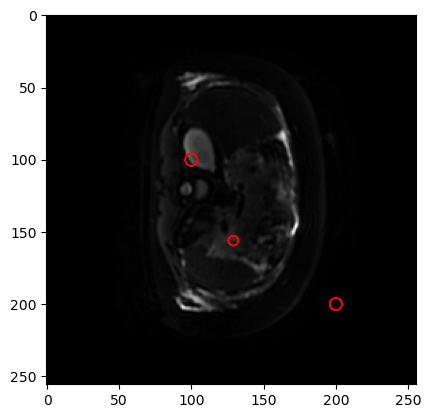

In [4]:
for analysis in n_analysis:
    analysis.plot_pancreas_slice(plot_roi=True)

## Plot the IVIM parameters

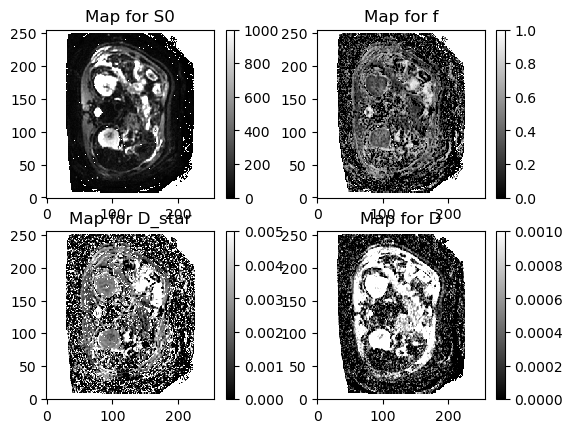

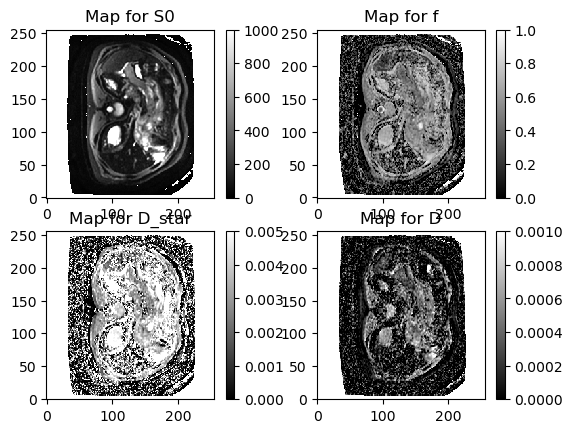

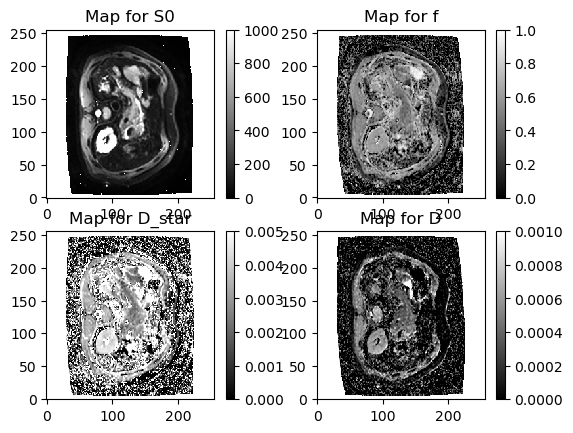

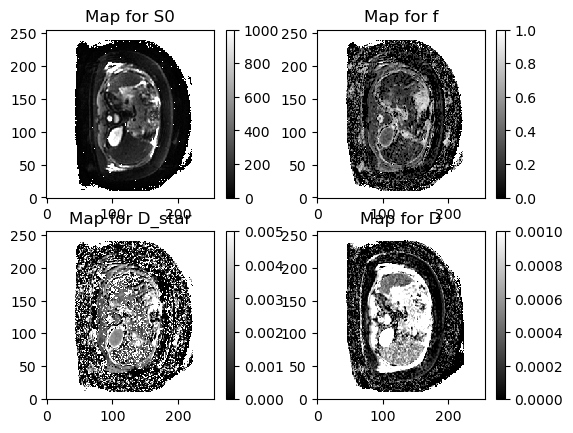

In [5]:
list_fig_ivim = {}
for analysis in n_analysis:
    list_fig_ivim[analysis.patient_id] = analysis.plot_ivim()

In [10]:
import os
from datetime import date
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches

# 创建输出目录
output_dir = f"../output/{date.today()}"
os.makedirs(output_dir, exist_ok=True)

# 保存图片
for i, fig in list_fig_ivim.items():
    image_path = os.path.join(output_dir, i)
    os.makedirs(image_path, exist_ok=True)
    image_path = os.path.join(image_path, "ivim_params.png")
    fig.savefig(image_path)


In [12]:
# 创建 PowerPoint 演示文稿
def generate_pptx():
    prs = Presentation()


    for i, fig in list_fig_ivim.items():
        # 添加幻灯片
        slide_layout = prs.slide_layouts[5]  # 使用空白幻灯片布局
        slide = prs.slides.add_slide(slide_layout)

        # 添加图片到幻灯片
        image_path = os.path.join(output_dir,i, "ivim_params.png")
        left = Inches(1)
        top = Inches(1)
        height = Inches(5.5)
        slide.shapes.add_picture(image_path, left, top, height=height)

    # 保存 PowerPoint 文件
    pptx_path = os.path.join(output_dir, "presentation.pptx")
    prs.save(pptx_path)

    print(f"PowerPoint 文件已保存到: {pptx_path}")

generate_pptx()

PowerPoint 文件已保存到: ../output/2024-09-12/presentation.pptx


10


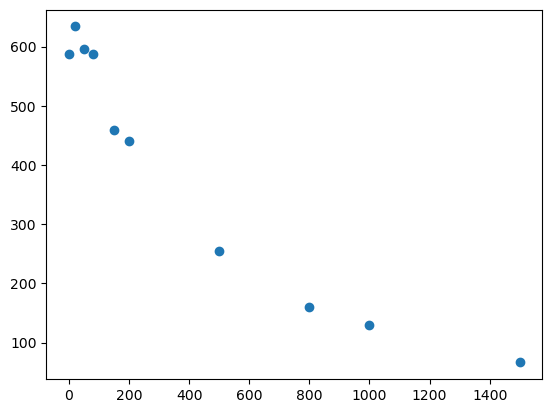

In [9]:
n_analysis[3].plot_b_intensities()